# Om NumPy

* Python-tillägg för att hantera stora arrayer av samma datatyper.
  * Vektorer
  * Matriser
  * ...
* Normala datastrukturer i Python är flexibla, men för långsamma för numeriska operationer.

# Använda NumPy

NumPy importeras enligt följande konvention.

In [0]:
import numpy as np

Anledningen till att vi inte bara importerar **numpy** utan importerar den som **np** är för att slippa skriva **numpy.** framför varje sats eller uttryck vi skriver. Det är inte heller rekommenderat att använda **from** för att importera NumPy eftersom det kan krocka med andra funktioner i Python.


# Array-objekt

Array-objektet är den huvudsakliga datatype in NumPy. För att vara effektiva vid numeriska operationer allokeras alla array-objekt som kontinuerliga block av värden i minnet.


## Skapa array-objekt

Nya array-objekt kan skapas med **np.array()**-funktionen. Första argumentet innehåller en lista eller en nästlad lista med värden. Sista argumentet anger datatypen för arrayen.


In [3]:
a = np.array([1, 2, 3], float)
print(a)

[1. 2. 3.]


Om ingen datatyp anges kommer NumPy att definiera datatypen beroende på vad anges som indata till funktionen.

In [4]:
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [5]:
a = np.array([1.0, 2.0, 3.0])
print(a)

[1. 2. 3.]


Jämfört med listor kan array-objekt bara innehålla värden av samma typ.

### Flerdimensionella arrayer

Flerdimensionella arryer kan skapas genom att ange nästlade listor i **np.array()** funktionen.


In [6]:
a = np.array([[1,2],[3,4]])
print(a)

b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

[[1 2]
 [3 4]]
[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


## Att använda arrayer

Arrays lagras alltid som 1-dimensionella block av värden i minnet. Dimensioner är egentligen bara ett sätt att komma till olika positioner i en 1-dimensionell matris.

NumPy lagrar arrayer i minnet rad-vis, vilket också hur C och C++ lagrar tvådimensionella arrayer. Fortran lagrar arrayer kolumnvis. Följande figur visar hur detta sker i minnet:

![variable references 1](https://github.com/jonaslindemann/guide_to_python/blob/master/chapters/kapitel5/notebooks/images/array1.png?raw=1)

### Array information

Det finns flera sätt att få information om array-objekt. En av de viktigare egenskaperna är array-objektets form, vilket kan fås genom egenskaper **.shape**.



In [7]:
a = np.array([1,2,3,4])
b = np.array([[1,2],[3,4]])
c = np.array([[[1,2,3,4],
               [5,6,7,8]],
              [[1,2,3,4],
               [5,6,7,8]]],float)

print(a.shape)
print(b.shape)
print(c.shape)

(4,)
(2, 2)
(2, 2, 4)


För tvådimensionella array-objekt kan variabler för antalet rader och kolumner tilldelas genom följande kod:

In [8]:
r, c = b.shape
print(r, c)

2 2


Antalet dimensioner för ett array-objekt nås genom egenskapen **.ndim**

In [9]:
print(b.ndim)

2


Det finns fler andra egenskaper som kan vara intressanta att få ut. Några av dessa visas i följande exempel:


In [10]:
b = np.array([[1,2],[3,4]])
print("array shape =", b.shape) # Size
print("array ndim =", b.ndim)   # Number of dimensions
print("array dtype =", b.dtype) # Data type
print("array size =", b.size)   # Number of elements in the array
print("array itemsize =", b.itemsize) # Size of an element in bytes

array shape = (2, 2)
array ndim = 2
array dtype = int64
array size = 4
array itemsize = 8


### Ändra formen på en array

**.reshape()** metoden kan användas för att ändra formen på en array. Så länge antalet värden i en array inte ändras kommer NumPy inte att omallkoera minnet för arrayen. För att visa att detta inte sker definierar vi först en funktion som returnerar array-objektes minnesaddress:


In [0]:
def memory_of(a):
    return a.__array_interface__["data"][0]

I följande exempel ändrar vi formen på ett array-objekt och undersöker om minnesallokeringen ändras genom detta.


In [12]:
a = np.array([[1,2],[3,4]])

print(a)
print(memory_of(a))

a_flat = np.reshape(a, [4,1])

print(a_flat)
print(memory_of(a_flat))

[[1 2]
 [3 4]]
47099136
[[1]
 [2]
 [3]
 [4]]
47099136


Vi ser här att minnet för array-objekten inte ändras och både **a** och **a_flat** pekar på samma minnesområde.


Ändrar man värden i **a** kommer också att ändra värden i **a_flat**


In [13]:
a[0,0] = 42

print(a)
print(a_flat)

[[42  2]
 [ 3  4]]
[[42]
 [ 2]
 [ 3]
 [ 4]]


Om man inte är ute efter detta när man gör tilldelningar av arrayer måste man använda metoden **.copy()** för att skapa en kopia av array-objektet.


In [14]:
c = a.copy()
c[0,0] = 84

print(a)
print(memory_of(a))

print(c)
print(memory_of(c))

[[42  2]
 [ 3  4]]
47099136
[[84  2]
 [ 3  4]]
47099168


Nu refererar inte **c** till samma minnes address som **a**.


Fler exempel:


In [15]:
b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

b_shaped = np.reshape(b, [8,])
print(b_shaped)

b_shaped = np.reshape(b, [4,2])
print(b_shaped)

# **Please note** this is not the same as:
b_trans = np.transpose(b)
print(b_trans)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
[1. 2. 3. 4. 5. 6. 7. 8.]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]
[[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]


### Ändra storleken på en array

**.resize()**-metoden används för att ändra storleken på ett redan existerande array-objekt. Existerande värde kommer att bibehållas i den mån det är möjligt. Nya värden kommer att fyllas med värden från det tidigare array-objektet.


In [16]:
base = np.array([[1,2],[3,4]])
print(base)

big = np.resize(base, [9,9])
print(big)

big = np.resize(base, [4,4])
print(big)

big = np.resize(base, [4,2])
print(big)

[[1 2]
 [3 4]]
[[1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 2]
 [3 4]
 [1 2]
 [3 4]]


## Funktioner för att skapa array-objekt

I många fall är det omöjligt att skapa arrayer med hjälp av funktionen **np.array()**. För att skapa större arrayer innehåller NumPy ett antal funktioner för att skapa olika typer av arrayer.


### Array-objekt med nollor

En vanlig typ av array-objekt är en array fylld med nollor. Dessa kan skapas med funktionen **np.zeros()**. Funktionen tar formen på array-objektet som skall skapas som argument samt ett argument för datatypen.


In [17]:
a = np.zeros([4,4])
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [18]:
b = np.zeros([4,4], int)
print(b)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


### Array-objekt med ettor

Arrayer med ettor skapas på samma sätt med funktionen **np.ones()**.


In [19]:
c = np.ones([5,10], float)
print(c)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


Det är möjligt att med hjälp av **np.ones()** skapa arrayer med ett viss värde:

In [20]:
c = np.ones([5,10], float) * 42.0
print(c)

[[42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]]


### Array områden

I många tillämpningar behöver man skapa array-object med områden av siffervärden. Detta kan göras med funktionen **np.arange()** som påminner om standard python-funktionen **range()**. En array med 10 element och värden från 0 till 9 skapas med:


In [21]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


Genom att kombinera **np.arange()** med **np.reshape()** är det möjligt att skapa olika array-objekt fyllda med värdeområden:


In [22]:
b = np.reshape(np.arange(100), [10,10])
print(b)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


Det är möjlig att ge start, slut och steglängd precis som **range()**-funktionen


In [23]:
a = np.arange(-10,10)
print(a)

a = np.arange(-10,10,2)
print(a)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
[-10  -8  -6  -4  -2   0   2   4   6   8]


Precis som för **np.array()** är det också möjligt att ange datatyp för områdes-arrayen.


In [24]:
a = np.arange(-10,10,2, dtype=float)
print(a)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.]


### Indentitetsarrayer

En annan vanlig array-typ är identitetsmatrisen. Denna kan lätt skapas med funktionen **np.identity()**-funktionen. Funktionen tar storleken som indata samt en valfritt argument för datatypen.


In [25]:
i = np.identity(10)
print(i)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Array-objekt med linjär variation

**np.arange()** fungerar bäst om området är heltal. Om man behöver ett mer precist område är det bättre att använda funktionen **np.linspace()**. Funktionen tar start, slutvärde och antalet värden i array-objektet som indata. Värdena mellan start och slutvärde interpoleras av funktionen.


In [26]:
x = np.linspace(0,1.0,10)
print(x)

x = np.linspace(0,1.0,20)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


# Array uttryck

Alla Python operatorer kan användas med arrayer. Alla operationer utförs elementvis på värdena i array-objektet.


In [27]:
a = np.arange(25).reshape([5,5])
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Elementvis addition:


In [28]:
print(a+3)

[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25 26 27]]


Elementvis multiplikation:


In [29]:
print(a*3)

[[ 0  3  6  9 12]
 [15 18 21 24 27]
 [30 33 36 39 42]
 [45 48 51 54 57]
 [60 63 66 69 72]]


Det går också att använda det vanliga matematiska funktionerna på array-objekt:


In [30]:
print(np.sin(a))

[[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825  0.41211849]
 [-0.54402111 -0.99999021 -0.53657292  0.42016704  0.99060736]
 [ 0.65028784 -0.28790332 -0.96139749 -0.75098725  0.14987721]
 [ 0.91294525  0.83665564 -0.00885131 -0.8462204  -0.90557836]]


Negation:

In [31]:
print(-a)

[[  0  -1  -2  -3  -4]
 [ -5  -6  -7  -8  -9]
 [-10 -11 -12 -13 -14]
 [-15 -16 -17 -18 -19]
 [-20 -21 -22 -23 -24]]


Det går också att använda operatorerna mellan olika array-objekt:


In [32]:
print(a+a)

[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [40 42 44 46 48]]


Array-storlekarna behäver inte vara samma. Operationerna på den mindre arrayen kommer att upprepas på den större arrayen:


In [33]:
a = np.array([1,2,3]) 
b = np.ones([5,3])
print(a)
print(b)
print(a+b)

[1 2 3]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


## Matrismultiplikation

**\*** operatorn för arrayer är ekvivalent till elementvis multiplikation. För att utföra en matrismultiplikation används istället funktionen **.dot()** eller **@**-operatorn.


In [34]:
a = np.reshape(np.arange(16), [4,4])
print(a)
print(a.dot(a))
print(a @ a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]
[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]


# Delområden

Att nå specifika element i en array använder man säg av Pythons normala index operator **\[ ]**


In [35]:
a = np.arange(25)
print(a)
print(a[2])

b = np.arange(25).reshape([5,5])

print(b)
print(b[1,2])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
2
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
7


Tilldelning av värde i en array sker på samma sätt:



In [36]:
a[2] = 42
b[1,2] = 42

print(a)
print(b)

[ 0  1 42  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6 42  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Det är också möjligt att referera till delområden. Notationen beskrivs i följande punkter:

* a[start:slut] - värden mellan*start* och *slut-1*
* a[start:] - värden mellan *start* to the *slut*
* a[:slut] - värden upp till *slut-1*
* a[:] - Alla värden

In [37]:
a = np.arange(25)
print(a[1:5])

[1 2 3 4]


NumPy försöker i de flesta fall återanvända allokerat minne när man skapar delområden.


In [38]:
a = np.arange(25)

print(a)
print(memory_of(a))
print(a.data)

b = a[1:5]

print(b)
print(memory_of(b))
print(b.data)

b[0] = 42

print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
44690272
[1 2 3 4]
44690280
[ 0 42  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[42  2  3  4]


Fler exempel på delområden:


In [39]:
a = np.arange(16)

print(a)
print(a[:-1]) # Alla element utom det sista
print(a[:-2]) # Alla element utom de två sista
print(a[-1]) # Sista elementet i a
print(a[4:10:2]) # Alla element 4 till 9 med steg 2
print(a[::-1]) # Alla element i A i omvänd ordning

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
15
[4 6 8]
[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


Delområden kan användas i flerdimensionella arrayer också:


In [40]:
b = np.reshape(a, (4,4))

print(b)
print(b[:,0]) # Alla rader i kolumn 0
print(b[:,0:2]) # Alla rader för kolumn 0..1
print(b[0,:]) # Alla kolumner i rad 0
print(b[0:2,:]) # Alla kolumner för rad 0..1
print(b[-1,:]) # Sista raden i b
print(b[:,-1]) # Sista kolumnen i b
print(b[::2,:]) # Varannan rad i b
print(b[:,::2]) # Varannan kolumn i b

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 0  4  8 12]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[0 1 2 3]
[[0 1 2 3]
 [4 5 6 7]]
[12 13 14 15]
[ 3  7 11 15]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]


Det är också möjlig att blanda array-objekt och listor när man skapar array-objekt:


In [0]:
b[1] = [42,42,42,42]

In [0]:
b[:,2] = [42,42,42,42]

In [43]:
print(b)

[[ 0  1 42  3]
 [42 42 42 42]
 [ 8  9 42 11]
 [12 13 42 15]]


# Array metoder

Det finns ett antal funktioner som kan vara viktiga när man arbetar med array-objekt:


## Beräkna summan av värden i arrayer

**.sum()** metoden kan användas för att beräkna summan av arrayer på olika sätt:


In [44]:
a = np.arange(36).reshape(6,6)

print(a)
print(a.sum())

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
630


In [45]:
print(a.sum(0)) # Summera kolumner
print(a.sum(1)) # Summera rader

[ 90  96 102 108 114 120]
[ 15  51  87 123 159 195]


## Beräkna produkten av en array

Metoden **.prod()** kan användas på samma sätt som **.sum()**, men beräknar istället produkten av värdena i arrayen.


In [55]:
a = np.arange(1,37,dtype=float).reshape(6,6)
print(a)

[[ 1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17. 18.]
 [19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30.]
 [31. 32. 33. 34. 35. 36.]]


In [56]:
print(a.prod(0)) # Produkten av kolumner
print(a.prod(1)) # Produkten av rader

[ 1339975.  3727360.  7577955. 13404160. 21827575. 33592320.]
[7.20000000e+02 6.65280000e+05 1.33660800e+07 9.69091200e+07
 4.27518000e+08 1.40241024e+09]


# Matris-objekt (Matrix)

NumPy innehåller också speciella datatyper för att hantera matriser enligt den matematiska definitionen. Matriser skapas genom att använda klassen **np.matrix**, vilken ärver sin funktionalitet från array-klassen. Klassen implementera många vanliga operationer inom linjär algebra.


In [57]:
A = np.matrix( [[1,2,3],[11,12,13],[21,22,23]])
x = np.matrix( [[1],[2],[3]] )
y = np.matrix( [[1,2,3]] )

print(A)
print(x)
print(y)
print(A.T) # Matrix transpose
print(A*x) # Matrix mulitply A * x
print(A.I) # Matrix inverse

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
[[1]
 [2]
 [3]]
[[1 2 3]]
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]]
[[ 14]
 [ 74]
 [134]]
[[ 2.81474977e+14 -5.62949953e+14  2.81474977e+14]
 [-5.62949953e+14  1.12589991e+15 -5.62949953e+14]
 [ 2.81474977e+14 -5.62949953e+14  2.81474977e+14]]


# Läsa och skriva arrayer

NumPy har många sätt att hantera skrivning och läsning av array-objekt:

* Skriva arrayer i NumPy:s egna binära format NPY/NPZ.
* Texfiler med värden rad för rad.
* Direkt läsning och skrivning av binära filer.

## Läsa och skriva NPY/NPZ filer

### Skriva NPY filer

In [0]:
import numpy as np

x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

np.save("x.npy", x)
np.save("y.npy", y)

### Läsa NPY filer

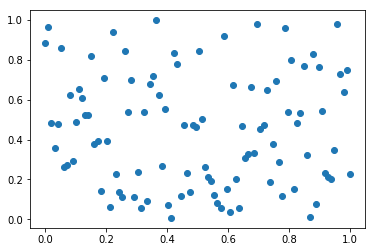

In [60]:
import matplotlib.pyplot as plt

x = np.load("x.npy")
y = np.load("y.npy")

plt.plot(x, y, 'o')

### Använda filobjekt tillsammans med NPY-filer

In [0]:
x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

with open("xy.dat", "wb") as f:
    np.save(f, x)
    np.save(f, y)

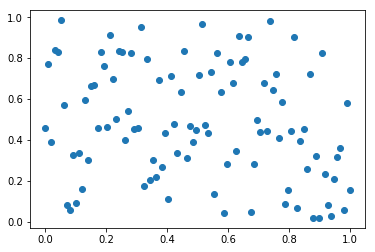

In [62]:
import matplotlib.pyplot as plt

with open("xy.dat", "rb") as f:
    x = np.load(f)
    y = np.load(f)

plt.plot(x, y, 'o')

# Lösa ekvationssystem

En vanlig operation inom linjär algebra och ingenjörsuppgifter är att kunna lösa ekvationssystem av typen


Ax = b

NumPy innehåller en funktion för just detta,  **np.linalg()**.

In [63]:
A = np.matrix(
    [[1, 2, 3], 
     [11, 12, 13], 
     [21, 22, 23]]
)

b = np.matrix(
    [[1], 
     [2], 
     [3]])

print(A)
print(b)

x = np.linalg.solve(A, b)

print(x)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
[[1]
 [2]
 [3]]
[[-0.01875]
 [-0.6625 ]
 [ 0.78125]]
